In [2]:
# Data imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [4]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
X = iris.data

Y = iris.target

In [12]:
iris_data = DataFrame(X,columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

In [13]:
iris_target = DataFrame(Y, columns=['Species'])

In [18]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [19]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [22]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [23]:
iris=pd.concat([iris_data, iris_target], axis=1)

In [24]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


c:\users\petar lovric\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


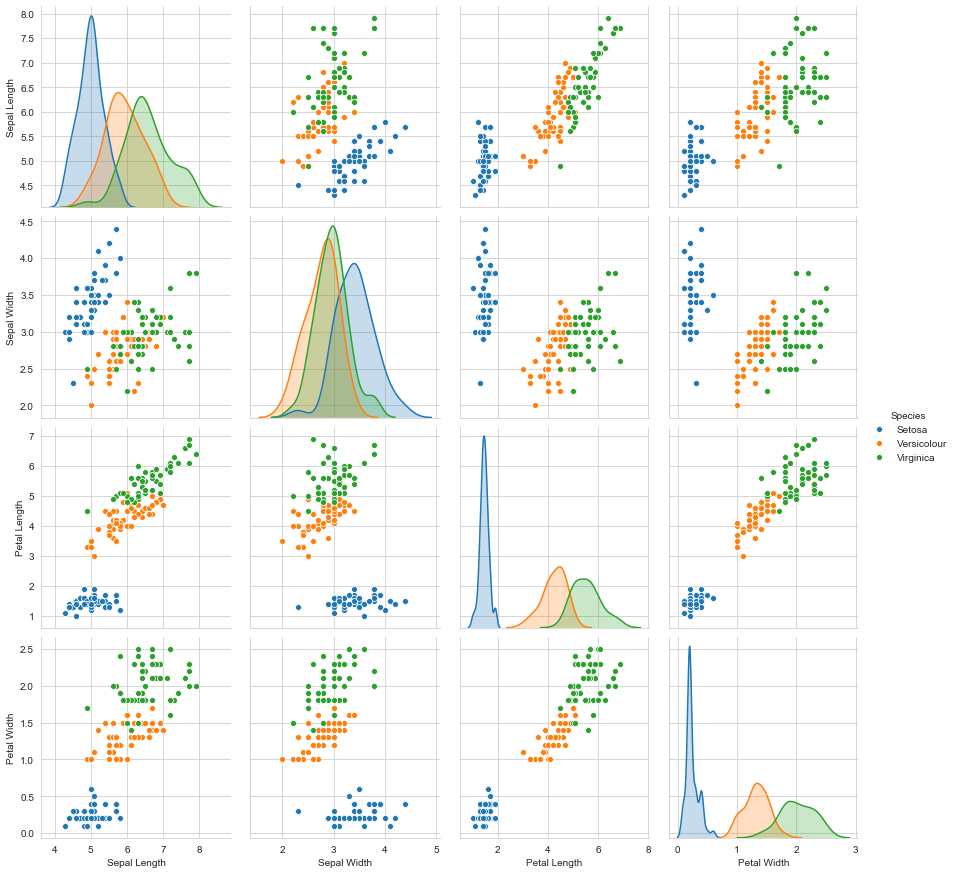

In [26]:
sns.pairplot(iris, hue='Species', size=3)

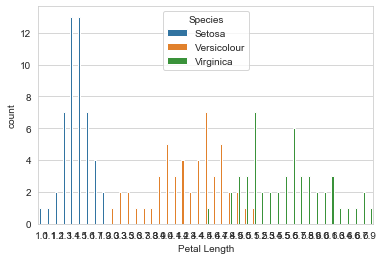

In [32]:
sns.countplot('Petal Length', data=iris, hue='Species')

In [52]:
#Import SciKit Learn Log Reg
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Create a Logistic Regression Class object
logreg= LogisticRegression()

#Split the data into Training and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=3)

#Train the odel with the training set
logreg.fit(X_train, Y_train)

c:\users\petar lovric\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
#Import testing metriccs from SciKit learn
from sklearn import metrics

In [54]:
Y_pred = logreg.predict(X_test)

In [55]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9777777777777777


In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [71]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [72]:
Y_pred = knn.predict(X_test)

In [73]:
print( metrics.accuracy_score(Y_test, Y_pred))

0.9555555555555556


In [74]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [75]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [76]:
Y_pred = knn.predict(X_test)

In [77]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9555555555555556


In [81]:
k_range= range(1,21)
accuracy=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Testing accuracy')

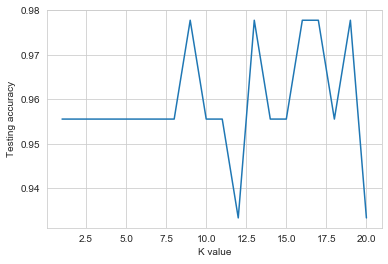

In [83]:
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel('Testing accuracy')